<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_Arima(Delhi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
files=files.upload()

Saving Delhi.xlsx to Delhi.xlsx


In [3]:
df = pd.read_excel (r'Delhi.xlsx',header=0, parse_dates=True)

In [4]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 3000)
from scipy import interpolate
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
#df = pd.read_csv('delhi.csv')
df.head()

,date,pm25
0,2018-04-20 00:00:00,92
1,2018-04-19 23:00:00,89
2,2018-04-19 22:00:00,75
3,2018-04-19 21:00:00,57
4,2018-04-19 20:00:00,57


In [5]:

df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')


In [6]:
df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)
df['pm25_U']=df['pm25']

In [7]:
start=df.date.min()
stop=df.date.max()
seriesDate=[]

while start < stop:
    start = start + timedelta(hours=1)
    seriesDate.append(start)

df3 = pd.DataFrame(columns = ['date', 'pm25']) 
df3['date']=seriesDate


In [8]:
result = pd.merge(df, df3, on="date", how="outer")


In [9]:
result=result.drop(columns=['pm25_y'])
result=result.rename(columns={"pm25_x": "pm25"})
result.count()

date      2617
pm25      2294
pm25_U    2294
dtype: int64

In [10]:
result=result.sort_values(by='date')
result = result.reset_index(drop=True)
result

,date,pm25,pm25_U
0,2018-01-01 00:00:00,423.0,423.0
1,2018-01-01 01:00:00,414.0,414.0
2,2018-01-01 02:00:00,417.0,417.0
3,2018-01-01 03:00:00,466.0,466.0
4,2018-01-01 04:00:00,470.0,470.0
5,2018-01-01 05:00:00,449.0,449.0
6,2018-01-01 06:00:00,404.0,404.0
7,2018-01-01 07:00:00,380.0,380.0
8,2018-01-01 08:00:00,371.0,371.0
9,2018-01-01 09:00:00,332.0,332.0


In [11]:
df=result

In [12]:
df_missing=df[(df['pm25'].isnull()==True)]
df_missing['date']=pd.to_datetime(df_missing['date'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df = df.dropna()
df.count()

date      2294
pm25      2294
pm25_U    2294
dtype: int64

In [14]:
df_missing.count()

date      323
pm25        0
pm25_U      0
dtype: int64

## Handling missing data -  mean before after method - mean of indentical hour in the week  (+3 , -3)

In [15]:
def timewise_mean(arg_date):
    df1=df[(df['date'].dt.hour == arg_date.hour) & (df['date'].dt.day > arg_date.day-3) & (df['date'].dt.day < arg_date.day+3)] 
    return df1.pm25.mean()

for index,row in df_missing.iterrows():
    df_missing.at[index, 'pm25_U'] =timewise_mean(row['date'])
    

In [16]:
df2 = df.append(df_missing)
df2.pm25_U.count()
df2['date']=pd.to_datetime(df2['date'])
df2['pm25']=df2['pm25'].astype(str).astype(float)
df2['pm25_U']=df2['pm25_U'].astype(str).astype(float)

In [17]:
df2=df2.sort_values(by='date')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2616
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2617 non-null   datetime64[ns]
 1   pm25    2294 non-null   float64       
 2   pm25_U  2617 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 81.8 KB


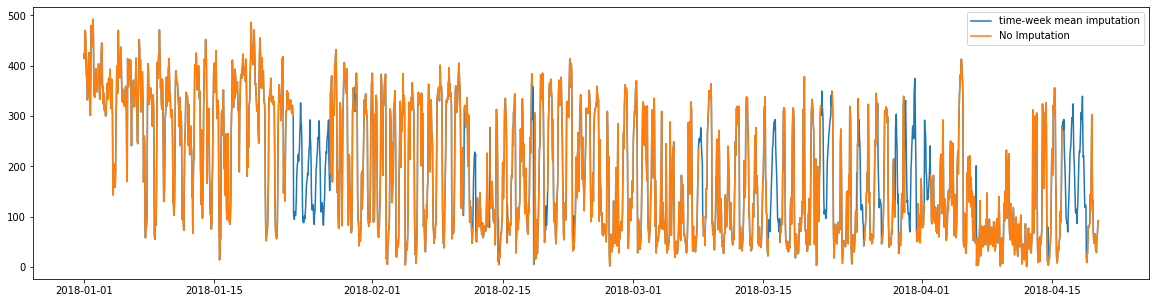

In [19]:
import matplotlib.pyplot as plt
RN=[]
for i in range(0,df2.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df2['date'], df2['pm25_U'])
plt.plot(df2['date'], df2['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [20]:
df_Jan=df2.loc[(df2['date'].dt.day >= 15) & (df2['date'].dt.day <= 30) & (df2['date'].dt.month == 1)] 


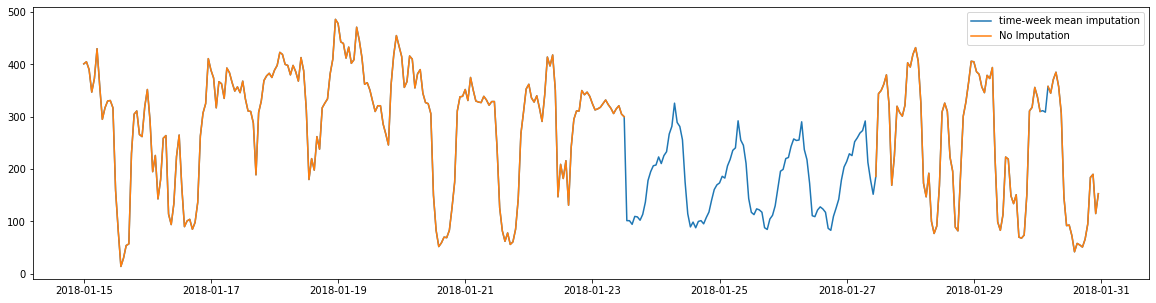

In [21]:

RN=[]
for i in range(0,df_Jan.pm25_U.count()):
    RN.append(i)
plt.figure(figsize=(20,5))

plt.plot(df_Jan['date'], df_Jan['pm25_U'])
plt.plot(df_Jan['date'], df_Jan['pm25'])
labels = []
labels.append('time-week mean imputation')
labels.append('No Imputation')
plt.legend(labels)

In [31]:
df=df2

In [32]:
df

,date,pm25,pm25_U
0,2018-01-01 00:00:00,423.0,423.000000
1,2018-01-01 01:00:00,414.0,414.000000
2,2018-01-01 02:00:00,417.0,417.000000
3,2018-01-01 03:00:00,466.0,466.000000
4,2018-01-01 04:00:00,470.0,470.000000
5,2018-01-01 05:00:00,449.0,449.000000
6,2018-01-01 06:00:00,404.0,404.000000
7,2018-01-01 07:00:00,380.0,380.000000
8,2018-01-01 08:00:00,371.0,371.000000
9,2018-01-01 09:00:00,332.0,332.000000


In [33]:
df=df.drop(columns=['pm25'])

In [35]:
df=df.set_index('date')

In [36]:
df

,pm25_U
date,
2018-01-01 00:00:00,423.000000
2018-01-01 01:00:00,414.000000
2018-01-01 02:00:00,417.000000
2018-01-01 03:00:00,466.000000
2018-01-01 04:00:00,470.000000
2018-01-01 05:00:00,449.000000
2018-01-01 06:00:00,404.000000
2018-01-01 07:00:00,380.000000
2018-01-01 08:00:00,371.000000


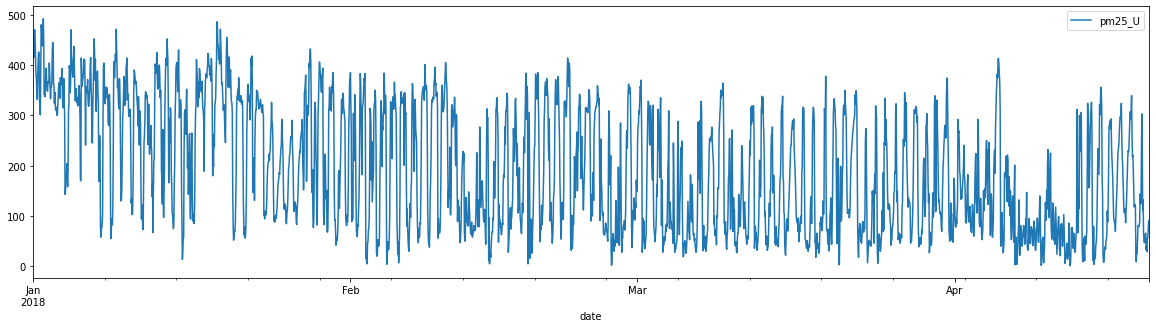

In [39]:
from pandas import read_csv
from matplotlib import pyplot
df.plot(figsize=(20,5))
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79c45e4e0>]],
      dtype=object)

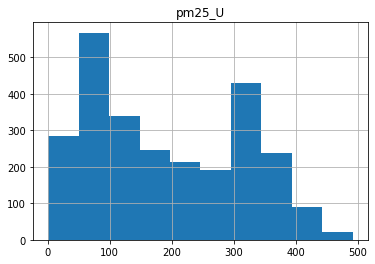

In [40]:
df.hist()

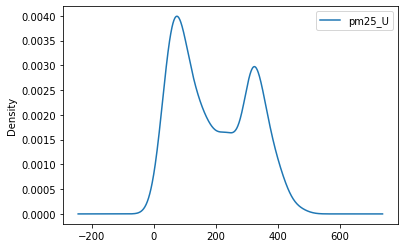

In [41]:
df.plot(kind='kde')

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [43]:

# separate out a validation dataset
dataset = df.head(2095)
validation = df.tail(522)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 2095, Validation 522


Persistence/ Base model

In [84]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [85]:

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=78.706, Expected=277.000
>Predicted=277.000, Expected=176.000
>Predicted=176.000, Expected=149.000
>Predicted=149.000, Expected=117.000
>Predicted=117.000, Expected=143.000
>Predicted=143.000, Expected=169.000
>Predicted=169.000, Expected=170.000
>Predicted=170.000, Expected=136.000
>Predicted=136.000, Expected=114.000
>Predicted=114.000, Expected=93.000
>Predicted=93.000, Expected=88.000
>Predicted=88.000, Expected=88.000
>Predicted=88.000, Expected=113.000
>Predicted=113.000, Expected=71.000
>Predicted=71.000, Expected=44.000
>Predicted=44.000, Expected=95.000
>Predicted=95.000, Expected=247.000
>Predicted=247.000, Expected=313.000
>Predicted=313.000, Expected=293.000
>Predicted=293.000, Expected=295.000
>Predicted=295.000, Expected=196.000
>Predicted=196.000, Expected=11.000
>Predicted=11.000, Expected=96.500
>Predicted=96.500, Expected=5.000
>Predicted=5.000, Expected=27.000
>Predicted=27.000, Expected=24.000
>Predicted=24.000, Expected=18.000
>Predicted=18.000, Expected

ARIMA Hyperparameters

In [86]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [93]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(4,1,4)).fit(disp=0)
pred=model.forecast(steps=24)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima

55.18419086907952

Grid search for p,d,q values

In [58]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [68]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(0, 1)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Build Model based on the optimized values

In [69]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [70]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

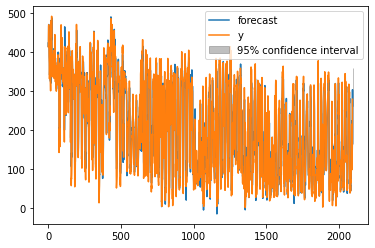

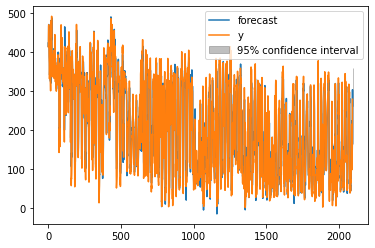

In [91]:
# fit model
model = ARIMA(X, order=(4,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=24)[0]
model_fit.plot_predict(1, 2095)

In [92]:
pd.DataFrame(forecast)

,0
0,262.076690
1,241.922773
2,221.402114
3,200.189606
4,177.979824
5,155.192844
6,132.856127
7,112.298743
8,94.878524
9,81.787533
